In [1]:
import pandas as pd
import requests 
import sys
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')
data.head(2)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\mwj05\AppData\Local\Temp\ipykernel_17548\3427963180.py:1: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_csv('D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')


,행정구역,인구수,남자인구수,여자인구수,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,...,의원 수,PC방 수,카페 수,학교 수,학원 수,일반음식점 수,편의점 수,어린이집 수,유치원 수,종합병원 수
0,봉담읍,92823,46958,45865,8298,10731,11389,13631,17139,14590,...,91,42,5,14,222,856,63,78,15,0
1,우정읍,17439,9598,7841,639,1353,1718,1557,2493,3635,...,28,14,1,7,17,348,27,7,5,0


In [3]:
data_all = data[['행정구역','인구수','체육시설 수', '병원 수','정류장 수','도서관 수', '노래방 수',
        '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수','의원 수','PC방 수','카페 수','학교 수','학원 수','편의점 수','어린이집 수','유치원 수','일반음식점 수','종합병원 수']]
data_all.head(2)


,행정구역,인구수,체육시설 수,병원 수,정류장 수,도서관 수,노래방 수,"박물관,미술관 수",시장 및 마트 수,약국 수,...,의원 수,PC방 수,카페 수,학교 수,학원 수,편의점 수,어린이집 수,유치원 수,일반음식점 수,종합병원 수
0,봉담읍,92823,66,2,220,1,44,1,44,30,...,91,42,5,14,222,63,78,15,856,0
1,우정읍,17439,16,2,189,2,12,0,12,9,...,28,14,1,7,17,27,7,5,348,0


In [4]:
#청년
young = data[['행정구역','10-19세','20-29세','병원 수','노래방 수','체육시설 수','도서관 수','박물관,미술관 수','시장 및 마트 수', '약국 수', 
              '정류장 수','영화관 수',  '의원 수', 'PC방 수', '카페 수', '학교 수','학원 수',
              '일반음식점 수', '편의점 수','어린이집 수','유치원 수','종합병원 수']]
young['청년 수'] = young['10-19세'] + young['20-29세']
young.drop(columns=['10-19세','20-29세'], inplace=True)
#청년, 중년


young_middle = data[['행정구역','10-19세','20-29세','30-39세','40-49세','병원 수','노래방 수','체육시설 수','도서관 수','박물관,미술관 수','시장 및 마트 수', '약국 수', 
                     '정류장 수','영화관 수',  '의원 수', 'PC방 수', '카페 수', '학교 수','학원 수',
                     '일반음식점 수', '편의점 수','어린이집 수','유치원 수','종합병원 수']]
young_middle['청년+중년 수'] = young_middle['10-19세'] + young_middle['20-29세'] + young_middle['30-39세'] + young_middle['40-49세']
young_middle.drop(columns=['10-19세','20-29세','30-39세','40-49세'], inplace=True)

# 유아, 중년
kid_middle = data[['행정구역','0-9세','30-39세','40-49세','병원 수','노래방 수','체육시설 수','도서관 수','박물관,미술관 수','시장 및 마트 수', '약국 수', 
                    '정류장 수','영화관 수',  '의원 수', 'PC방 수', '카페 수', '학교 수','학원 수',
                    '일반음식점 수', '편의점 수','어린이집 수','유치원 수','종합병원 수']]
kid_middle['유아+중년 수'] = kid_middle['0-9세'] + kid_middle['30-39세'] + kid_middle['40-49세']
kid_middle.drop(columns=['0-9세','30-39세','40-49세'], inplace=True)
# 청년 데이터프레임 재배열
young = young[['행정구역', '청년 수'] + [col for col in young.columns if col not in ['행정구역', '청년 수']]]

# 청년+중년 데이터프레임 재배열
young_middle = young_middle[['행정구역', '청년+중년 수'] + [col for col in young_middle.columns if col not in ['행정구역', '청년+중년 수']]]

# 유아+중년 데이터프레임 재배열
kid_middle = kid_middle[['행정구역', '유아+중년 수'] + [col for col in kid_middle.columns if col not in ['행정구역', '유아+중년 수']]]
young.to_csv('young.csv', encoding='cp949', index=False)
young_middle.to_csv('young_middle.csv', encoding='cp949', index=False)
kid_middle.to_csv('kid_middle.csv', encoding='cp949', index=False)

C:\Users\mwj05\AppData\Local\Temp\ipykernel_17548\4244627760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young['청년 수'] = young['10-19세'] + young['20-29세']
C:\Users\mwj05\AppData\Local\Temp\ipykernel_17548\4244627760.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young.drop(columns=['10-19세','20-29세'], inplace=True)
C:\Users\mwj05\AppData\Local\Temp\ipykernel_17548\4244627760.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [5]:
print(young.head(2))
print(young_middle.head(2))
print(kid_middle.head(2))

  행정구역   청년 수  병원 수  노래방 수  체육시설 수  도서관 수  박물관,미술관 수  시장 및 마트 수  약국 수  정류장 수  \
0  봉담읍  22120     2     44      66      1          1         44    30    220   
1  우정읍   3071     2     12      16      2          0         12     9    189   

   ...  의원 수  PC방 수  카페 수  학교 수  학원 수  일반음식점 수  편의점 수  어린이집 수  유치원 수  종합병원 수  
0  ...    91     42     5    14   222      856     63      78     15       0  
1  ...    28     14     1     7    17      348     27       7      5       0  

[2 rows x 21 columns]
  행정구역  청년+중년 수  병원 수  노래방 수  체육시설 수  도서관 수  박물관,미술관 수  시장 및 마트 수  약국 수  \
0  봉담읍    52890     2     44      66      1          1         44    30   
1  우정읍     7121     2     12      16      2          0         12     9   

   정류장 수  ...  의원 수  PC방 수  카페 수  학교 수  학원 수  일반음식점 수  편의점 수  어린이집 수  유치원 수  \
0    220  ...    91     42     5    14   222      856     63      78     15   
1    189  ...    28     14     1     7    17      348     27       7      5   

   종합병원 수  
0       0  
1       0  

## 전체 연령

In [6]:
# 모든 열에 대해 정규화 수행
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 행정구역 열 제외하고 모든 열 정규화
data_normalized = data_all.copy()
columns_to_normalize = data_all.columns.drop('행정구역')
data_normalized[columns_to_normalize] = scaler.fit_transform(data_all[columns_to_normalize])
data_all = data_normalized

In [7]:
data_all.head(2)

,행정구역,인구수,체육시설 수,병원 수,정류장 수,도서관 수,노래방 수,"박물관,미술관 수",시장 및 마트 수,약국 수,...,의원 수,PC방 수,카페 수,학교 수,학원 수,편의점 수,어린이집 수,유치원 수,일반음식점 수,종합병원 수
0,봉담읍,1.000000,0.985075,0.333333,0.859375,0.333333,0.830189,0.2,0.830189,0.769231,...,0.957895,0.456522,0.357143,0.736842,0.676829,0.750000,1.000000,0.9375,0.682616,0.0
1,우정읍,0.187874,0.238806,0.333333,0.738281,0.666667,0.226415,0.0,0.226415,0.230769,...,0.294737,0.152174,0.071429,0.368421,0.051829,0.321429,0.089744,0.3125,0.277512,0.0


<Axes: >

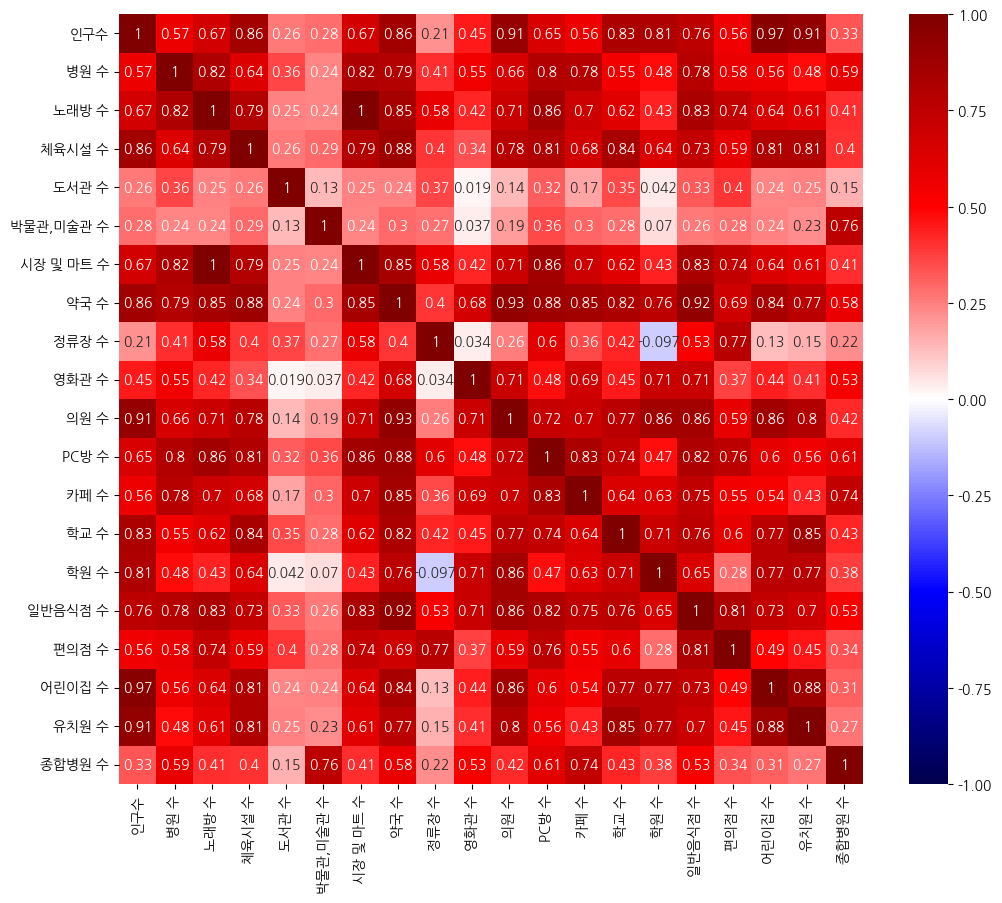

In [8]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

corrMat = data_all[['인구수','병원 수','노래방 수','체육시설 수','도서관 수','박물관,미술관 수','시장 및 마트 수', '약국 수', 
                    '정류장 수','영화관 수',  '의원 수', 'PC방 수', '카페 수', '학교 수','학원 수',
                    '일반음식점 수', '편의점 수','어린이집 수','유치원 수','종합병원 수']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrMat, cmap='seismic', annot=True, vmin = -1, vmax = 1)

In [9]:
# 인구 데이터를 y로, 나머지 데이터 중 상관관계가 거의 없는 것과 행정동 제외, 다중공선성은 일단 고려 X
drop_columns = ['인구수','행정구역']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_all.drop(drop_columns, axis = 1), data_all['인구수'], test_size=0.2, random_state=0)

In [11]:
y_train = y_train.astype('float')
y_test = y_test.astype('float')
X_train = X_train.astype('float')
X_test = X_test.astype('float')
#데이터를 float 형으로 변환

In [12]:
def RMSE(y_true, y_pred):
  output = np.sqrt(np.mean((y_true - y_pred)**2))
  return output

In [13]:
from sklearn.ensemble import RandomForestRegressor
#랜덤 포레스트를 위한 라이브러리

RF_model = RandomForestRegressor(random_state = 40, n_estimators = 20, max_depth=3) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train) #학습

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=40)

In [14]:
RF_pred_train = RF_model.predict(X_train)
RF_pred_test = RF_model.predict(X_test)

In [15]:
RMSE(np.array(y_train), RF_pred_train)

np.float64(0.0402730709808611)

In [16]:
RMSE(np.array(y_test), RF_pred_test)

np.float64(0.09173975633356854)

In [17]:
RF_model.feature_importances_

array([7.95108007e-02, 1.14298610e-02, 3.49206789e-02, 8.11685793e-03,
       3.23140630e-03, 1.81358911e-02, 1.64491113e-02, 1.19263248e-01,
       9.61033157e-04, 2.13506084e-01, 1.11496994e-03, 6.60303637e-04,
       2.53567079e-04, 1.58704737e-01, 1.22510258e-02, 3.09244609e-01,
       8.90882907e-03, 7.06885550e-04, 2.63010008e-03])

In [18]:
X_train.columns

Index(['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', '박물관,미술관 수', '시장 및 마트 수',
       '약국 수', '영화관 수', '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수',
       '어린이집 수', '유치원 수', '일반음식점 수', '종합병원 수'],
      dtype='object')

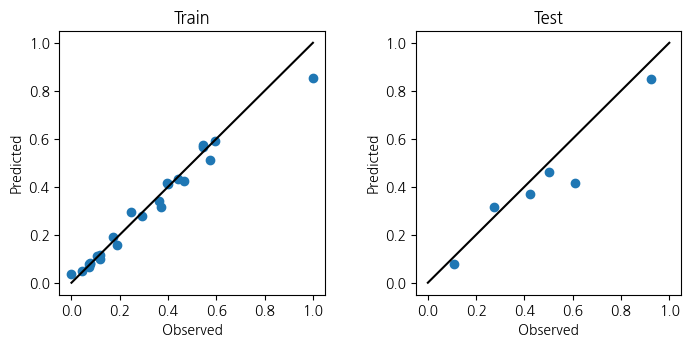

In [19]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

#모델의 결과를 그림으로 그리기
fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV #그리드 서치 라이브러리
from sklearn import metrics #평가지표 판단에 쓰는 라이브러리

RF_model = RandomForestRegressor()

RMSE_scorer = metrics.make_scorer(RMSE, greater_is_better = False)
#평가함수. RMSE로 평가할거임. 값이 큰 것이 좋은게 아니므로(오차를 나타내므로 작은게 좋다) False

RF_params = {'random_state' : [40], 'n_estimators': list(range(5, 51, 5)), 'max_depth': list(range(2, 6, 1))}
#랜덤성 고정시키고 샘플링을 5~50 5단위로(즉, 5, 10, 15, ..), 최대 깊이를 2~5 1단위로 (즉, 2, 3, 4, 5)

In [21]:
GS_RF_model = GridSearchCV(estimator = RF_model,
                           param_grid = RF_params,
                           scoring = RMSE_scorer,
                           cv = 5)
     

In [22]:
GS_RF_model.fit(X_train, y_train)

d:\system\conda\contest\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50],
                         'random_state': [40]},
             scoring=make_scorer(RMSE, greater_is_better=False, response_method='predict'))

In [23]:
GS_RF_model.best_params_

{'max_depth': 5, 'n_estimators': 10, 'random_state': 40}

In [24]:
GS_RF_pred_test = GS_RF_model.best_estimator_.predict(X_test)
GS_RF_pred_train = GS_RF_model.best_estimator_.predict(X_train)

In [25]:
RMSE(y_train, GS_RF_pred_train)

np.float64(0.03345283978304202)

In [26]:
RMSE(y_test, GS_RF_pred_test)

np.float64(0.08047903233025952)

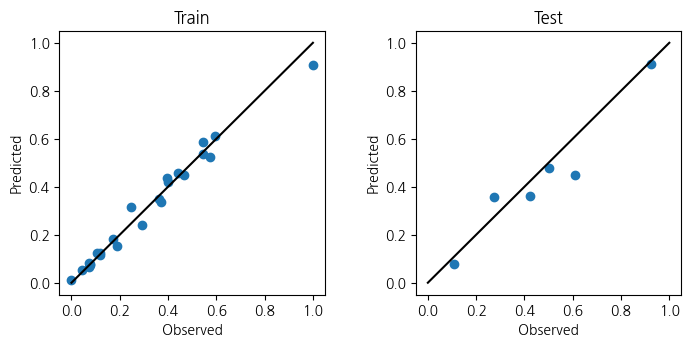

In [27]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, GS_RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, GS_RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [28]:
RF_model = RandomForestRegressor(random_state = 40, n_estimators = 10, max_depth=5) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=40)

In [29]:
RF_model.feature_importances_

array([5.24826832e-02, 1.88488431e-03, 3.57995801e-02, 1.76018355e-03,
       2.16260741e-03, 2.01979690e-02, 3.10311061e-02, 5.05004407e-04,
       1.38573951e-03, 2.11592294e-01, 8.93425135e-04, 0.00000000e+00,
       1.21239846e-04, 3.06546132e-01, 1.90337136e-02, 2.94747181e-01,
       9.75119262e-03, 4.91277931e-03, 5.19228550e-03])

In [30]:
X_train.columns

Index(['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', '박물관,미술관 수', '시장 및 마트 수',
       '약국 수', '영화관 수', '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수',
       '어린이집 수', '유치원 수', '일반음식점 수', '종합병원 수'],
      dtype='object')

In [31]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')

scaler = MinMaxScaler()
# 행정구역 열 제외하고 모든 열 정규화
pred_normalized = pred_data.copy()
columns_to_normalize = pred_data.columns.drop('행정구역','인구수')
pred_normalized[columns_to_normalize] = scaler.fit_transform(pred_data[columns_to_normalize])
pred_normalized['인구수'] = scaler.fit_transform(pred_data['인구수'].values.reshape(-1,1))
pred_data = pred_normalized

# pred_data = pred_data[pred_data['행정구역']=='매송면'] # 매송면

pred_data.drop(['0-9세','10-19세','20-29세','30-39세','40-49세','50-59세','60-69세','70-79세','80-89세','90-99세','100세 이상','남자인구수',
                '여자인구수'], axis=1, inplace=True)

pred_x = pred_data[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                    '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                    'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                    '유치원 수', '일반음식점 수', '종합병원 수']]
pred_y = pred_data['인구수']

res = GS_RF_model.predict(pred_x)
res_unscaled = scaler.inverse_transform([res])
print(res_unscaled)

[[84354.5        14304.2        84644.9        56911.8
   6248.88333333  7386.85        7640.83333333 11660.61666667
   7006.48333333 11496.6         7399.4         4881.95
  10578.56666667 33343.18333333 54514.45       40420.8
  29371.65       38808.8        16956.73333333 22167.1
  49753.55       31190.03333333 42351.         48555.45
  44300.15       41581.7        41638.2        32345.03333333
  33506.81666667  1110.        ]]


In [32]:
original_population = pd.DataFrame(res_unscaled[0], columns=['인구수'])
original_population['행정구역'] = pred_data['행정구역']
original_population = original_population[['행정구역', '인구수']]
original_population

,행정구역,인구수
0,봉담읍,84354.500000
1,우정읍,14304.200000
2,향남읍,84644.900000
3,남양읍,56911.800000
4,매송면,6248.883333
5,비봉면,7386.850000
6,마도면,7640.833333
7,송산면,11660.616667
8,서신면,7006.483333
9,팔탄면,11496.600000


In [33]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')
pred_data.head(2)

,행정구역,인구수,남자인구수,여자인구수,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,...,의원 수,PC방 수,카페 수,학교 수,학원 수,일반음식점 수,편의점 수,어린이집 수,유치원 수,종합병원 수
0,봉담읍,92823,46958,45865,8298,10731,11389,13631,17139,14590,...,91,42,5,14,222,856,63,78,15,0
1,우정읍,17439,9598,7841,639,1353,1718,1557,2493,3635,...,28,14,1,7,17,348,27,7,5,0


In [285]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')

increase_amount = 1
facility_idx = 15  # 병원
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','인구수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                                '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                                'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                                '유치원 수', '일반음식점 수', '종합병원 수']]
    mod_pred_y = modified_data['인구수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['인구수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,84354.500000,84354.500000,0.00,0.000000
1,우정읍,14304.200000,14304.200000,0.00,0.000000
2,향남읍,84644.900000,84644.900000,0.00,0.000000
3,남양읍,56911.800000,56911.800000,0.00,0.000000
4,매송면,6248.883333,6248.883333,0.00,0.000000
5,비봉면,7386.850000,7386.850000,0.00,0.000000
6,마도면,7640.833333,7640.833333,0.00,0.000000
7,송산면,11660.616667,11660.616667,0.00,0.000000
8,서신면,7006.483333,7006.483333,0.00,0.000000
9,팔탄면,11496.600000,11496.600000,0.00,0.000000


In [286]:
# # 동부: 동탄 기배 반월 병점 진안 화산
# # 서부: 남양 마도 매송 비봉 서신 송산 새솔
# # 남부: 봉담 양감 우정 장안 향남 정남 팔탄
# print(f'병원 {increase_amount}개증가 시 인구 증가율')
# print(f"동부 평균 인구 증가율: {result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean()} %")
# print(f"서부 평균 인구 증가율: {result_df.iloc[[3,4,5,6,7,8,13],4].mean()} %")
# print(f"남부 평균 인구 증가율: {result_df.iloc[[0,1,2,9,10,11,12],4].mean()} %")

In [287]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

병원 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.36 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 0.00 %


In [288]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.36 %
서부 평균 인구 증가율: 0.00 %


In [289]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')

increase_amount = 1
facility_idx = 18  # 도서관
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','인구수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                                '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                                'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                                '유치원 수', '일반음식점 수', '종합병원 수']]
    mod_pred_y = modified_data['인구수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['인구수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,84354.500000,84644.900000,290.40,0.344261
1,우정읍,14304.200000,14304.200000,0.00,0.000000
2,향남읍,84644.900000,84644.900000,0.00,0.000000
3,남양읍,56911.800000,56911.800000,0.00,0.000000
4,매송면,6248.883333,6228.133333,-20.75,-0.332059
5,비봉면,7386.850000,7366.100000,-20.75,-0.280905
6,마도면,7640.833333,7640.833333,0.00,0.000000
7,송산면,11660.616667,11793.616667,133.00,1.140591
8,서신면,7006.483333,7006.483333,0.00,0.000000
9,팔탄면,11496.600000,11496.600000,0.00,0.000000


In [290]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

도서관 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.39 %
서부 평균 인구 증가율: 0.08 %
남부 평균 인구 증가율: 0.00 %


In [291]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.39 %
서부 평균 인구 증가율: 0.02 %


In [292]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')

increase_amount = 1
facility_idx = 20  # 시장 및 마트 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','인구수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                                '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                                'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                                '유치원 수', '일반음식점 수', '종합병원 수']]
    mod_pred_y = modified_data['인구수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['인구수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,84354.500000,84354.500000,0.00,0.000000
1,우정읍,14304.200000,14304.200000,0.00,0.000000
2,향남읍,84644.900000,84644.900000,0.00,0.000000
3,남양읍,56911.800000,56911.800000,0.00,0.000000
4,매송면,6248.883333,6248.883333,0.00,0.000000
5,비봉면,7386.850000,7386.850000,0.00,0.000000
6,마도면,7640.833333,7640.833333,0.00,0.000000
7,송산면,11660.616667,11660.616667,0.00,0.000000
8,서신면,7006.483333,7006.483333,0.00,0.000000
9,팔탄면,11496.600000,11496.600000,0.00,0.000000


In [293]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

시장 및 마트 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.05 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 0.00 %


In [294]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.05 %
서부 평균 인구 증가율: 0.00 %


In [295]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')

increase_amount = 1
facility_idx = 21  # 약국 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','인구수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                                '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                                'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                                '유치원 수', '일반음식점 수', '종합병원 수']]
    mod_pred_y = modified_data['인구수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['인구수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,84354.500000,84354.500000,0.0,0.000000
1,우정읍,14304.200000,14304.200000,0.0,0.000000
2,향남읍,84644.900000,84644.900000,0.0,0.000000
3,남양읍,56911.800000,56911.800000,0.0,0.000000
4,매송면,6248.883333,6646.483333,397.6,6.362737
5,비봉면,7386.850000,7360.150000,-26.7,-0.361453
6,마도면,7640.833333,7640.833333,0.0,0.000000
7,송산면,11660.616667,11660.616667,0.0,0.000000
8,서신면,7006.483333,6969.283333,-37.2,-0.530937
9,팔탄면,11496.600000,11611.700000,115.1,1.001166


In [296]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

약국 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.78 %
남부 평균 인구 증가율: 0.80 %


In [297]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.79 %


In [298]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')

increase_amount = 1
facility_idx = 22  # 정류장 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','인구수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                                '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                                'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                                '유치원 수', '일반음식점 수', '종합병원 수']]
    mod_pred_y = modified_data['인구수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['인구수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,84354.500000,84354.500000,0.0,0.0
1,우정읍,14304.200000,14304.200000,0.0,0.0
2,향남읍,84644.900000,84644.900000,0.0,0.0
3,남양읍,56911.800000,56911.800000,0.0,0.0
4,매송면,6248.883333,6248.883333,0.0,0.0
5,비봉면,7386.850000,7386.850000,0.0,0.0
6,마도면,7640.833333,7640.833333,0.0,0.0
7,송산면,11660.616667,11660.616667,0.0,0.0
8,서신면,7006.483333,7006.483333,0.0,0.0
9,팔탄면,11496.600000,11496.600000,0.0,0.0


In [299]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

정류장 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 0.00 %


In [300]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %


In [301]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')

increase_amount = 1
facility_idx = 24  # 의원 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','인구수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                                '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                                'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                                '유치원 수', '일반음식점 수', '종합병원 수']]
    mod_pred_y = modified_data['인구수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['인구수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,84354.500000,84354.500000,0.0,0.000000
1,우정읍,14304.200000,14304.200000,0.0,0.000000
2,향남읍,84644.900000,84644.900000,0.0,0.000000
3,남양읍,56911.800000,56911.800000,0.0,0.000000
4,매송면,6248.883333,6248.883333,0.0,0.000000
5,비봉면,7386.850000,7397.350000,10.5,0.142144
6,마도면,7640.833333,7640.833333,0.0,0.000000
7,송산면,11660.616667,11660.616667,0.0,0.000000
8,서신면,7006.483333,7006.483333,0.0,0.000000
9,팔탄면,11496.600000,11496.600000,0.0,0.000000


In [302]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

의원 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 1.50 %
서부 평균 인구 증가율: 0.02 %
남부 평균 인구 증가율: 0.00 %


In [303]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 1.50 %
서부 평균 인구 증가율: 0.01 %


In [313]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')

increase_amount = 1
facility_idx = 30  # 편의점 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','인구수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                                '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                                'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                                '유치원 수', '일반음식점 수', '종합병원 수']]
    mod_pred_y = modified_data['인구수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['인구수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,84354.500000,84354.500000,0.0,0.0
1,우정읍,14304.200000,14304.200000,0.0,0.0
2,향남읍,84644.900000,84644.900000,0.0,0.0
3,남양읍,56911.800000,56911.800000,0.0,0.0
4,매송면,6248.883333,6248.883333,0.0,0.0
5,비봉면,7386.850000,7386.850000,0.0,0.0
6,마도면,7640.833333,7640.833333,0.0,0.0
7,송산면,11660.616667,11660.616667,0.0,0.0
8,서신면,7006.483333,7006.483333,0.0,0.0
9,팔탄면,11496.600000,11496.600000,0.0,0.0


In [314]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

편의점 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 0.00 %


In [315]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %


In [316]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')

increase_amount = 1
facility_idx = 29  # 일반 음식점 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','인구수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                                '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                                'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                                '유치원 수', '일반음식점 수', '종합병원 수']]
    mod_pred_y = modified_data['인구수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['인구수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,84354.500000,84354.500000,0.0,0.0
1,우정읍,14304.200000,14304.200000,0.0,0.0
2,향남읍,84644.900000,84644.900000,0.0,0.0
3,남양읍,56911.800000,56911.800000,0.0,0.0
4,매송면,6248.883333,6248.883333,0.0,0.0
5,비봉면,7386.850000,7386.850000,0.0,0.0
6,마도면,7640.833333,7640.833333,0.0,0.0
7,송산면,11660.616667,11660.616667,0.0,0.0
8,서신면,7006.483333,7006.483333,0.0,0.0
9,팔탄면,11496.600000,11496.600000,0.0,0.0


In [317]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

일반음식점 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 0.00 %


In [318]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %


In [319]:
pred_data = pd.read_csv(r'D:\coding\공모전\화성\화성시인프라.csv', encoding='cp949')

increase_amount = 1
facility_idx = 33  # 종합병원 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','인구수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['인구수'] = scaler.fit_transform(modified_data['인구수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                                '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                                'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                                '유치원 수', '일반음식점 수', '종합병원 수']]
    mod_pred_y = modified_data['인구수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['인구수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,84354.500000,84354.500000,0.00,0.000000
1,우정읍,14304.200000,16030.500000,1726.30,12.068483
2,향남읍,84644.900000,84644.900000,0.00,0.000000
3,남양읍,56911.800000,56911.800000,0.00,0.000000
4,매송면,6248.883333,8258.433333,2009.55,32.158546
5,비봉면,7386.850000,9396.400000,2009.55,27.204424
6,마도면,7640.833333,9671.133333,2030.30,26.571709
7,송산면,11660.616667,13293.316667,1632.70,14.001832
8,서신면,7006.483333,9016.033333,2009.55,28.681293
9,팔탄면,11496.600000,13222.900000,1726.30,15.015744


In [320]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

종합병원 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.43 %
서부 평균 인구 증가율: 18.37 %
남부 평균 인구 증가율: 15.62 %


In [321]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %")

동부 평균 인구 증가율: 0.43 %
서부 평균 인구 증가율: 16.99 %


---

## young

In [224]:
young.head(2)

,행정구역,청년 수,병원 수,노래방 수,체육시설 수,도서관 수,"박물관,미술관 수",시장 및 마트 수,약국 수,정류장 수,...,의원 수,PC방 수,카페 수,학교 수,학원 수,일반음식점 수,편의점 수,어린이집 수,유치원 수,종합병원 수
0,봉담읍,1.000000,0.333333,0.830189,0.985075,0.333333,0.2,0.830189,0.769231,0.859375,...,0.957895,0.456522,0.357143,0.736842,0.676829,0.682616,0.750000,1.000000,0.9375,0.0
1,우정읍,0.138834,0.333333,0.226415,0.238806,0.666667,0.0,0.226415,0.230769,0.738281,...,0.294737,0.152174,0.071429,0.368421,0.051829,0.277512,0.321429,0.089744,0.3125,0.0


<Axes: >

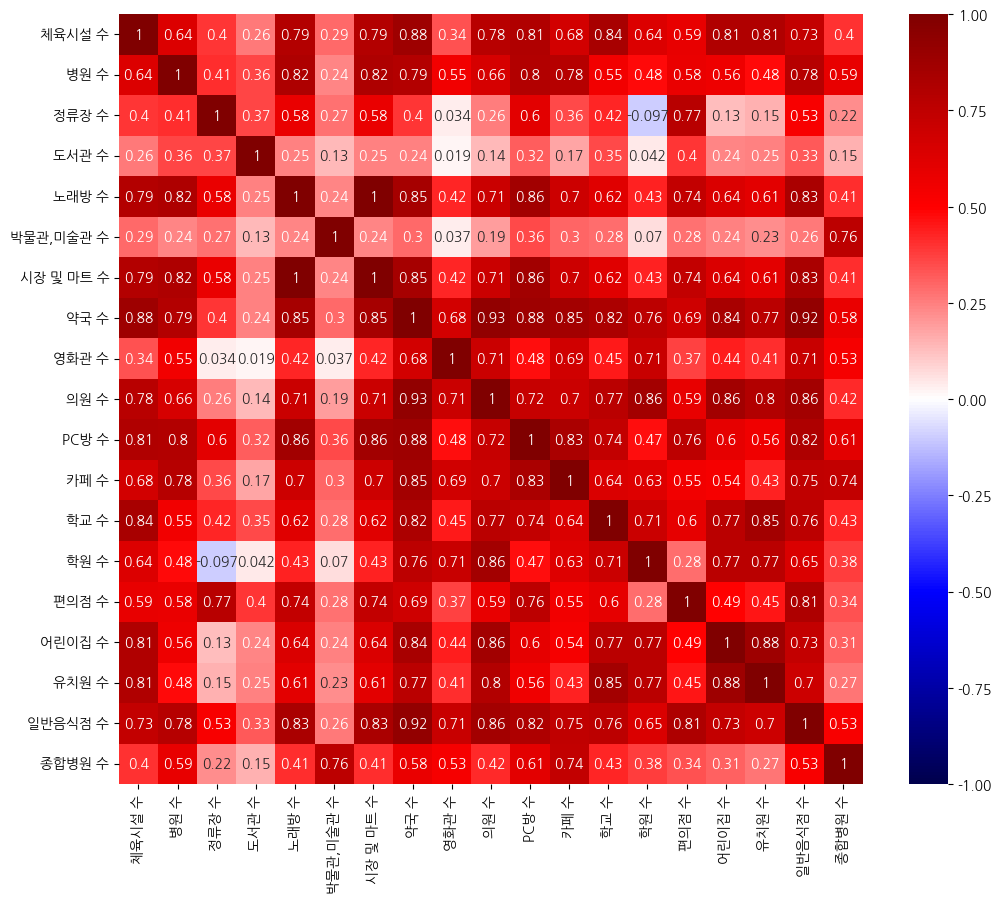

In [225]:
# 모든 열에 대해 정규화 수행
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 행정구역 열 제외하고 모든 열 정규화
data_normalized = young.copy()
columns_to_normalize = young.columns.drop('행정구역')
data_normalized[columns_to_normalize] = scaler.fit_transform(young[columns_to_normalize])
young = data_normalized
    
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

corrMat = young[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                                '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                                'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                                '유치원 수', '일반음식점 수', '종합병원 수']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrMat, cmap='seismic', annot=True, vmin = -1, vmax = 1)

In [226]:
# 청년 인구 비율 데이터를 y로, 나머지 데이터 중 상관관계가 거의 없는 것과 행정동 제외, 다중공선성은 일단 고려 X
drop_columns = ['청년 수','행정구역']

In [227]:
young.head(2)

,행정구역,청년 수,병원 수,노래방 수,체육시설 수,도서관 수,"박물관,미술관 수",시장 및 마트 수,약국 수,정류장 수,...,의원 수,PC방 수,카페 수,학교 수,학원 수,일반음식점 수,편의점 수,어린이집 수,유치원 수,종합병원 수
0,봉담읍,1.000000,0.333333,0.830189,0.985075,0.333333,0.2,0.830189,0.769231,0.859375,...,0.957895,0.456522,0.357143,0.736842,0.676829,0.682616,0.750000,1.000000,0.9375,0.0
1,우정읍,0.138834,0.333333,0.226415,0.238806,0.666667,0.0,0.226415,0.230769,0.738281,...,0.294737,0.152174,0.071429,0.368421,0.051829,0.277512,0.321429,0.089744,0.3125,0.0


In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(young.drop(drop_columns, axis = 1), young['청년 수'], test_size=0.2, random_state=0)

In [229]:
y_train = y_train.astype('float')
y_test = y_test.astype('float')
X_train = X_train.astype('float')
X_test = X_test.astype('float')
#데이터를 float 형으로 변환

In [230]:
from sklearn.ensemble import RandomForestRegressor
#랜덤 포레스트를 위한 라이브러리

RF_model = RandomForestRegressor(random_state = 40, n_estimators = 20, max_depth=3) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train) #학습

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=40)

In [231]:
RF_pred_train = RF_model.predict(X_train)
RF_pred_test = RF_model.predict(X_test)

In [232]:
RMSE(np.array(y_train), RF_pred_train)

np.float64(0.04707603216388688)

In [233]:
RMSE(np.array(y_test), RF_pred_test)

np.float64(0.062497549651900075)

In [234]:
RF_model.feature_importances_

array([7.04605405e-04, 1.08923009e-02, 5.81551515e-02, 1.92485631e-03,
       1.64376375e-02, 8.29468568e-04, 1.67663519e-01, 4.23219630e-03,
       2.67659470e-04, 2.09002923e-01, 8.74111100e-03, 7.08094929e-03,
       1.38346368e-02, 1.95874060e-01, 6.06472497e-04, 1.48611750e-02,
       2.76944757e-01, 1.02703268e-02, 1.67619321e-03])

In [235]:
X_train.columns

Index(['병원 수', '노래방 수', '체육시설 수', '도서관 수', '박물관,미술관 수', '시장 및 마트 수', '약국 수',
       '정류장 수', '영화관 수', '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '일반음식점 수',
       '편의점 수', '어린이집 수', '유치원 수', '종합병원 수'],
      dtype='object')

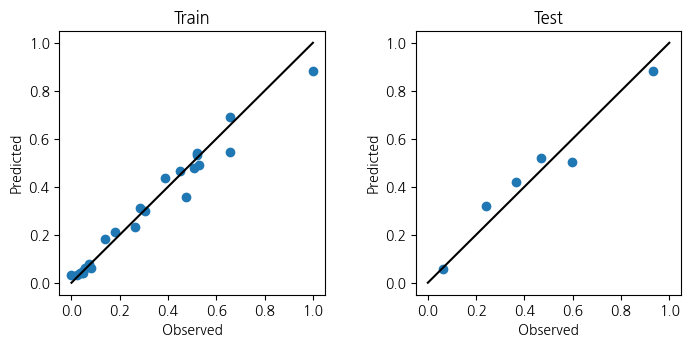

In [236]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

#모델의 결과를 그림으로 그리기
fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [237]:
from sklearn.model_selection import GridSearchCV #그리드 서치 라이브러리
from sklearn import metrics #평가지표 판단에 쓰는 라이브러리

RF_model = RandomForestRegressor()

RMSE_scorer = metrics.make_scorer(RMSE, greater_is_better = False)
#평가함수. RMSE로 평가할거임. 값이 큰 것이 좋은게 아니므로(오차를 나타내므로 작은게 좋다) False

RF_params = {'random_state' : [40], 'n_estimators': list(range(5, 51, 5)), 'max_depth': list(range(2, 6, 1))}
#랜덤성 고정시키고 샘플링을 5~50 5단위로(즉, 5, 10, 15, ..), 최대 깊이를 2~5 1단위로 (즉, 2, 3, 4, 5)

In [238]:
GS_RF_model = GridSearchCV(estimator = RF_model,
                           param_grid = RF_params,
                           scoring = RMSE_scorer,
                           cv = 5)
     

In [239]:
GS_RF_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50],
                         'random_state': [40]},
             scoring=make_scorer(RMSE, greater_is_better=False, response_method='predict'))

In [240]:
GS_RF_model.best_params_

{'max_depth': 2, 'n_estimators': 40, 'random_state': 40}

In [241]:
GS_RF_pred_test = GS_RF_model.best_estimator_.predict(X_test)
GS_RF_pred_train = GS_RF_model.best_estimator_.predict(X_train)

In [242]:
RMSE(y_train, GS_RF_pred_train)

np.float64(0.055106033647561226)

In [243]:
RMSE(y_test, GS_RF_pred_test)

np.float64(0.08211992358406123)

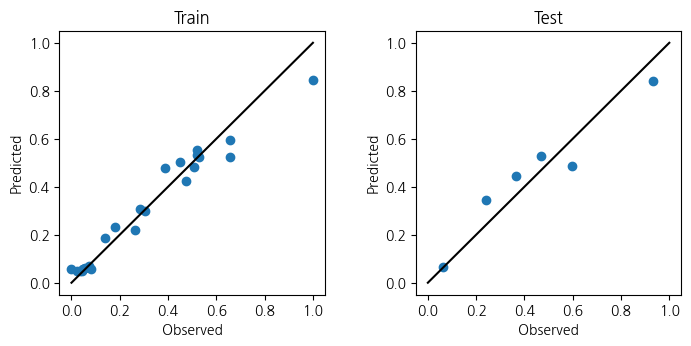

In [244]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, GS_RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, GS_RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [245]:
RF_model = RandomForestRegressor(random_state = 40, n_estimators = 40, max_depth=2) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=40, random_state=40)

In [246]:
RF_model.feature_importances_

array([0.        , 0.        , 0.07329335, 0.00412377, 0.01321372,
       0.00554744, 0.11856845, 0.00933626, 0.00055022, 0.26892903,
       0.00679357, 0.00327272, 0.01848055, 0.19230107, 0.        ,
       0.        , 0.26745865, 0.01813119, 0.        ])

In [247]:
X_train.columns

Index(['병원 수', '노래방 수', '체육시설 수', '도서관 수', '박물관,미술관 수', '시장 및 마트 수', '약국 수',
       '정류장 수', '영화관 수', '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '일반음식점 수',
       '편의점 수', '어린이집 수', '유치원 수', '종합병원 수'],
      dtype='object')

In [248]:
pred_data = pd.read_csv('young.csv', encoding='cp949')

scaler = MinMaxScaler()
# 행정구역 열 제외하고 모든 열 정규화
pred_normalized = pred_data.copy()
columns_to_normalize = pred_data.columns.drop(['행정구역','청년 수'])
pred_normalized[columns_to_normalize] = scaler.fit_transform(pred_data[columns_to_normalize])
pred_normalized['청년 수'] = scaler.fit_transform(pred_data['청년 수'].values.reshape(-1,1))
pred_data = pred_normalized

# pred_data = pred_data[pred_data['행정구역']=='매송면'] # 매송면
    

pred_x = pred_data[columns_to_normalize]
pred_y = pred_data['청년 수']

res = GS_RF_model.predict(pred_x)
res_unscaled = scaler.inverse_transform([res])
print(res_unscaled)

[[18720.27857143  4142.14706259 18589.20357143 11805.19729472
   1225.801852    1225.801852    1117.74431232  1582.39748692
   1117.74431232  1321.08797303  1467.58943137  1117.74431232
   1257.94248692  7636.48029672 12251.0744475  11122.06778083
   6580.85443452 10545.90242369  5163.05770743  4843.60336219
  13184.11423916  9401.89782051 11572.59208639 11615.92639194
  11706.21416972 10678.36125305 10801.80805861  6826.66248016
   9801.28055861  1310.61105114]]


In [249]:
original_population = pd.DataFrame(res_unscaled[0], columns=['청년 수'])
original_population['행정구역'] = pred_data['행정구역']
original_population = original_population[['행정구역', '청년 수']]
original_population

,행정구역,청년 수
0,봉담읍,18720.278571
1,우정읍,4142.147063
2,향남읍,18589.203571
3,남양읍,11805.197295
4,매송면,1225.801852
5,비봉면,1225.801852
6,마도면,1117.744312
7,송산면,1582.397487
8,서신면,1117.744312
9,팔탄면,1321.087973


In [250]:
pred_data = pd.read_csv('young.csv', encoding='cp949')

increase_amount = 1
facility_idx = 3  # 노래방 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','청년 수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['청년 수'] = scaler.fit_transform(modified_data['청년 수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[GS_RF_model.best_estimator_.feature_names_in_]
    mod_pred_y = modified_data['청년 수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['청년 수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,18720.278571,18720.278571,0.0,0.0
1,우정읍,4142.147063,4142.147063,0.0,0.0
2,향남읍,18589.203571,18589.203571,0.0,0.0
3,남양읍,11805.197295,11805.197295,0.0,0.0
4,매송면,1225.801852,1225.801852,0.0,0.0
5,비봉면,1225.801852,1225.801852,0.0,0.0
6,마도면,1117.744312,1117.744312,0.0,0.0
7,송산면,1582.397487,1582.397487,0.0,0.0
8,서신면,1117.744312,1117.744312,0.0,0.0
9,팔탄면,1321.087973,1321.087973,0.0,0.0


In [251]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

노래방 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 0.00 %


In [252]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %


In [254]:
pred_data = pd.read_csv('young.csv', encoding='cp949')

increase_amount = 1
facility_idx = 12 # PC방 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','청년 수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['청년 수'] = scaler.fit_transform(modified_data['청년 수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[GS_RF_model.best_estimator_.feature_names_in_]
    mod_pred_y = modified_data['청년 수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['청년 수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,18720.278571,18720.278571,0.0,0.0
1,우정읍,4142.147063,4142.147063,0.0,0.0
2,향남읍,18589.203571,18589.203571,0.0,0.0
3,남양읍,11805.197295,11805.197295,0.0,0.0
4,매송면,1225.801852,1225.801852,0.0,0.0
5,비봉면,1225.801852,1225.801852,0.0,0.0
6,마도면,1117.744312,1117.744312,0.0,0.0
7,송산면,1582.397487,1582.397487,0.0,0.0
8,서신면,1117.744312,1117.744312,0.0,0.0
9,팔탄면,1321.087973,1321.087973,0.0,0.0


In [255]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

PC방 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 0.00 %


In [256]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %


---

## young_middle

In [180]:
young_middle = pd.read_csv('young_middle.csv', encoding='cp949')


In [181]:
# 모든 열에 대해 정규화 수행
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 행정구역 열 제외하고 모든 열 정규화
data_normalized = young_middle.copy()
columns_to_normalize = young_middle.columns.drop('행정구역')
data_normalized[columns_to_normalize] = scaler.fit_transform(young_middle[columns_to_normalize])
young_middle = data_normalized

<Axes: >

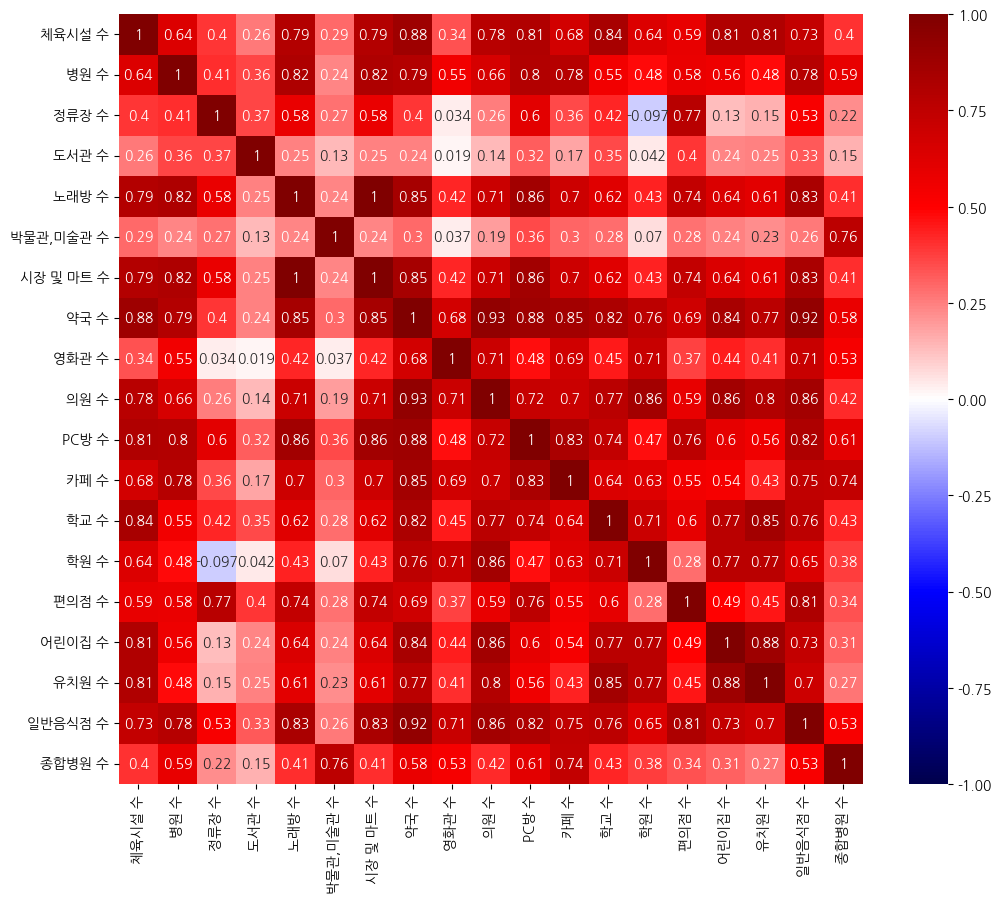

In [182]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

corrMat = young_middle[['체육시설 수', '병원 수', '정류장 수', '도서관 수', '노래방 수', 
                    '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수', '의원 수', 
                    'PC방 수', '카페 수', '학교 수', '학원 수', '편의점 수', '어린이집 수', 
                    '유치원 수', '일반음식점 수', '종합병원 수']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrMat, cmap='seismic', annot=True, vmin = -1, vmax = 1)

In [183]:
# 청년 인구 비율 데이터를 y로, 나머지 데이터 중 상관관계가 거의 없는 것과 행정동 제외, 다중공선성은 일단 고려 X
drop_columns = ['청년+중년 수','행정구역']

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(young_middle.drop(drop_columns, axis = 1), young_middle['청년+중년 수'], test_size=0.2, random_state=0)

In [185]:
y_train = y_train.astype('float')
y_test = y_test.astype('float')
X_train = X_train.astype('float')
X_test = X_test.astype('float')
#데이터를 float 형으로 변환

In [186]:
from sklearn.ensemble import RandomForestRegressor
#랜덤 포레스트를 위한 라이브러리

RF_model = RandomForestRegressor(random_state = 40, n_estimators = 20, max_depth=3) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train) #학습

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=40)

In [187]:
RF_pred_train = RF_model.predict(X_train)
RF_pred_test = RF_model.predict(X_test)

In [188]:
RMSE(np.array(y_train), RF_pred_train)

np.float64(0.04438212484681678)

In [189]:
RMSE(np.array(y_test), RF_pred_test)

np.float64(0.0814235472799409)

In [190]:
RF_model.feature_importances_

array([6.81814390e-04, 1.27796342e-03, 2.64600179e-02, 4.94583027e-03,
       1.08089021e-02, 8.96740303e-03, 8.26542068e-02, 2.04896468e-02,
       0.00000000e+00, 1.36566098e-01, 1.38695255e-02, 9.47433948e-04,
       1.12767068e-02, 3.47189800e-01, 2.02666799e-03, 1.10294130e-02,
       3.05843779e-01, 1.47942493e-02, 1.70541825e-04])

In [191]:
X_train.columns

Index(['병원 수', '노래방 수', '체육시설 수', '도서관 수', '박물관,미술관 수', '시장 및 마트 수', '약국 수',
       '정류장 수', '영화관 수', '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '일반음식점 수',
       '편의점 수', '어린이집 수', '유치원 수', '종합병원 수'],
      dtype='object')

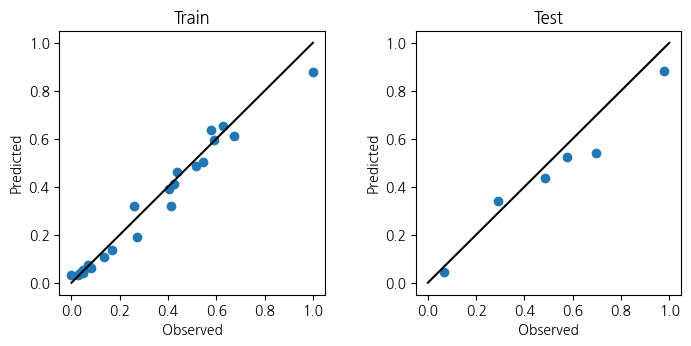

In [192]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

#모델의 결과를 그림으로 그리기
fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [193]:
from sklearn.model_selection import GridSearchCV #그리드 서치 라이브러리
from sklearn import metrics #평가지표 판단에 쓰는 라이브러리

RF_model = RandomForestRegressor()

RMSE_scorer = metrics.make_scorer(RMSE, greater_is_better = False)
#평가함수. RMSE로 평가할거임. 값이 큰 것이 좋은게 아니므로(오차를 나타내므로 작은게 좋다) False

RF_params = {'random_state' : [40], 'n_estimators': list(range(5, 51, 5)), 'max_depth': list(range(2, 6, 1))}
#랜덤성 고정시키고 샘플링을 5~50 5단위로(즉, 5, 10, 15, ..), 최대 깊이를 2~5 1단위로 (즉, 2, 3, 4, 5)

In [194]:
GS_RF_model = GridSearchCV(estimator = RF_model,
                           param_grid = RF_params,
                           scoring = RMSE_scorer,
                           cv = 5)
     

In [195]:
GS_RF_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50],
                         'random_state': [40]},
             scoring=make_scorer(RMSE, greater_is_better=False, response_method='predict'))

In [196]:
GS_RF_model.best_params_

{'max_depth': 5, 'n_estimators': 5, 'random_state': 40}

In [197]:
GS_RF_pred_test = GS_RF_model.best_estimator_.predict(X_test)
GS_RF_pred_train = GS_RF_model.best_estimator_.predict(X_train)

In [198]:
RMSE(y_train, GS_RF_pred_train)

np.float64(0.0319951995525064)

In [199]:
RMSE(y_test, GS_RF_pred_test)

np.float64(0.08436840977147823)

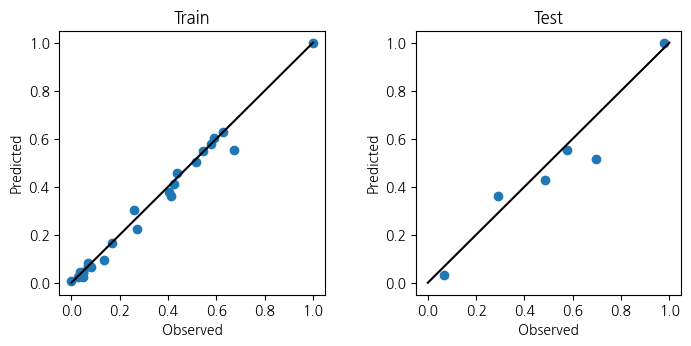

In [200]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, GS_RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, GS_RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [201]:
RF_model = RandomForestRegressor(random_state = 40, n_estimators = 5, max_depth=5) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5, random_state=40)

In [202]:
RF_model.feature_importances_

array([1.42290369e-03, 2.17163188e-04, 7.99699567e-03, 8.14727131e-04,
       3.09120929e-02, 9.55425485e-05, 5.49582406e-04, 8.44970200e-03,
       6.08448935e-04, 2.10516623e-01, 1.31129221e-04, 9.37690433e-06,
       4.15833897e-02, 4.94678630e-01, 5.03369590e-03, 1.47303325e-03,
       1.94616066e-01, 2.12355318e-04, 6.78541347e-04])

In [203]:
X_train.columns

Index(['병원 수', '노래방 수', '체육시설 수', '도서관 수', '박물관,미술관 수', '시장 및 마트 수', '약국 수',
       '정류장 수', '영화관 수', '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '일반음식점 수',
       '편의점 수', '어린이집 수', '유치원 수', '종합병원 수'],
      dtype='object')

In [204]:
pred_data = pd.read_csv('young_middle.csv', encoding='cp949')

scaler = MinMaxScaler()
# 행정구역 열 제외하고 모든 열 정규화
pred_normalized = pred_data.copy()
columns_to_normalize = pred_data.columns.drop('행정구역','청년+중년 수')
pred_normalized[columns_to_normalize] = scaler.fit_transform(pred_data[columns_to_normalize])
pred_normalized['청년+중년 수'] = scaler.fit_transform(pred_data['청년+중년 수'].values.reshape(-1,1))
pred_data = pred_normalized

# pred_data = pred_data[pred_data['행정구역']=='매송면'] # 매송면


pred_x = pred_data[GS_RF_model.best_estimator_.feature_names_in_]

pred_y = pred_data['청년+중년 수']

res = GS_RF_model.predict(pred_x)
res_unscaled = scaler.inverse_transform([res])
print(res_unscaled)

[[52890.          5076.2        52890.         30542.
   1263.6         2292.13333333  2183.73333333  4394.6
   2399.          3727.8         1631.8         1286.8
   3365.53333333 19046.4        31815.15       21859.8
  16059.66666667 24148.2         8776.         11757.6
  33284.         19027.06666667 26613.81666667 29363.
  29181.41666667 29133.21666667 27202.2        20101.26666667
  22684.86666667   392.8       ]]


In [205]:
original_population = pd.DataFrame(res_unscaled[0], columns=['청년+중년 수'])
original_population['행정구역'] = pred_data['행정구역']
original_population = original_population[['행정구역', '청년+중년 수']]
original_population

,행정구역,청년+중년 수
0,봉담읍,52890.000000
1,우정읍,5076.200000
2,향남읍,52890.000000
3,남양읍,30542.000000
4,매송면,1263.600000
5,비봉면,2292.133333
6,마도면,2183.733333
7,송산면,4394.600000
8,서신면,2399.000000
9,팔탄면,3727.800000


In [206]:
pred_data = pd.read_csv('young_middle.csv', encoding='cp949')

increase_amount = 1
facility_idx = 4  # 체육시설 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','청년+중년 수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['청년+중년 수'] = scaler.fit_transform(modified_data['청년+중년 수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[GS_RF_model.best_estimator_.feature_names_in_]
    mod_pred_y = modified_data['청년+중년 수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['청년+중년 수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,52890.000000,52890.000000,0.0,0.000000
1,우정읍,5076.200000,6088.800000,1012.6,19.947993
2,향남읍,52890.000000,52890.000000,0.0,0.000000
3,남양읍,30542.000000,30542.000000,0.0,0.000000
4,매송면,1263.600000,1263.600000,0.0,0.000000
5,비봉면,2292.133333,2292.133333,0.0,0.000000
6,마도면,2183.733333,2183.733333,0.0,0.000000
7,송산면,4394.600000,4394.600000,0.0,0.000000
8,서신면,2399.000000,2399.000000,0.0,0.000000
9,팔탄면,3727.800000,3727.800000,0.0,0.000000


In [207]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

체육시설 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 2.85 %


In [208]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 1.42 %


In [209]:
pred_data = pd.read_csv('young_middle.csv', encoding='cp949')

increase_amount = 1
facility_idx = 6  # 박물관,미술관 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','청년+중년 수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['청년+중년 수'] = scaler.fit_transform(modified_data['청년+중년 수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[GS_RF_model.best_estimator_.feature_names_in_]
    mod_pred_y = modified_data['청년+중년 수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['청년+중년 수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,52890.000000,52890.000000,0.0,0.000000
1,우정읍,5076.200000,5076.200000,0.0,0.000000
2,향남읍,52890.000000,52890.000000,0.0,0.000000
3,남양읍,30542.000000,35011.600000,4469.6,14.634274
4,매송면,1263.600000,1263.600000,0.0,0.000000
5,비봉면,2292.133333,2292.133333,0.0,0.000000
6,마도면,2183.733333,2183.733333,0.0,0.000000
7,송산면,4394.600000,4394.600000,0.0,0.000000
8,서신면,2399.000000,2399.000000,0.0,0.000000
9,팔탄면,3727.800000,3727.800000,0.0,0.000000


In [210]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

박물관,미술관 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 19.33 %
서부 평균 인구 증가율: 6.81 %
남부 평균 인구 증가율: 0.00 %


In [211]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 19.33 %
서부 평균 인구 증가율: 3.40 %


In [212]:
pred_data = pd.read_csv('young_middle.csv', encoding='cp949')

increase_amount = 1
facility_idx = 10  # 영화관 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','청년+중년 수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['청년+중년 수'] = scaler.fit_transform(modified_data['청년+중년 수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[GS_RF_model.best_estimator_.feature_names_in_]
    mod_pred_y = modified_data['청년+중년 수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['청년+중년 수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,52890.000000,52890.000000,0.0,0.0
1,우정읍,5076.200000,5076.200000,0.0,0.0
2,향남읍,52890.000000,52890.000000,0.0,0.0
3,남양읍,30542.000000,30542.000000,0.0,0.0
4,매송면,1263.600000,1263.600000,0.0,0.0
5,비봉면,2292.133333,2292.133333,0.0,0.0
6,마도면,2183.733333,2183.733333,0.0,0.0
7,송산면,4394.600000,4394.600000,0.0,0.0
8,서신면,2399.000000,2399.000000,0.0,0.0
9,팔탄면,3727.800000,3727.800000,0.0,0.0


In [213]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

영화관 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 0.00 %


In [214]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %


In [215]:
pred_data = pd.read_csv('young_middle.csv', encoding='cp949')

increase_amount = 1
facility_idx = 13  # 카페 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','청년+중년 수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['청년+중년 수'] = scaler.fit_transform(modified_data['청년+중년 수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[GS_RF_model.best_estimator_.feature_names_in_]
    mod_pred_y = modified_data['청년+중년 수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['청년+중년 수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,52890.000000,52890.000000,0.0,0.0
1,우정읍,5076.200000,5076.200000,0.0,0.0
2,향남읍,52890.000000,52890.000000,0.0,0.0
3,남양읍,30542.000000,30542.000000,0.0,0.0
4,매송면,1263.600000,1263.600000,0.0,0.0
5,비봉면,2292.133333,2292.133333,0.0,0.0
6,마도면,2183.733333,2183.733333,0.0,0.0
7,송산면,4394.600000,4394.600000,0.0,0.0
8,서신면,2399.000000,2399.000000,0.0,0.0
9,팔탄면,3727.800000,3727.800000,0.0,0.0


In [216]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

카페 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 0.00 %


In [217]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %


In [218]:
pred_data = pd.read_csv('young_middle.csv', encoding='cp949')

increase_amount = 1
facility_idx = 14  # 학교 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','청년+중년 수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['청년+중년 수'] = scaler.fit_transform(modified_data['청년+중년 수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[GS_RF_model.best_estimator_.feature_names_in_]
    mod_pred_y = modified_data['청년+중년 수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['청년+중년 수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,52890.000000,52890.000000,0.0,0.000000
1,우정읍,5076.200000,5076.200000,0.0,0.000000
2,향남읍,52890.000000,52890.000000,0.0,0.000000
3,남양읍,30542.000000,30542.000000,0.0,0.000000
4,매송면,1263.600000,1263.600000,0.0,0.000000
5,비봉면,2292.133333,2292.133333,0.0,0.000000
6,마도면,2183.733333,2183.733333,0.0,0.000000
7,송산면,4394.600000,4394.600000,0.0,0.000000
8,서신면,2399.000000,2399.000000,0.0,0.000000
9,팔탄면,3727.800000,3727.800000,0.0,0.000000


In [219]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

학교 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 0.00 %


In [220]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.00 %


In [221]:
pred_data = pd.read_csv('young_middle.csv', encoding='cp949')

increase_amount = 1
facility_idx = 15  # 학원 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','청년+중년 수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['청년+중년 수'] = scaler.fit_transform(modified_data['청년+중년 수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[GS_RF_model.best_estimator_.feature_names_in_]
    mod_pred_y = modified_data['청년+중년 수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['청년+중년 수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,52890.000000,52890.000000,0.0,0.000000
1,우정읍,5076.200000,5076.200000,0.0,0.000000
2,향남읍,52890.000000,52890.000000,0.0,0.000000
3,남양읍,30542.000000,30542.000000,0.0,0.000000
4,매송면,1263.600000,1263.600000,0.0,0.000000
5,비봉면,2292.133333,2292.133333,0.0,0.000000
6,마도면,2183.733333,2296.933333,113.2,5.183783
7,송산면,4394.600000,4394.600000,0.0,0.000000
8,서신면,2399.000000,2399.000000,0.0,0.000000
9,팔탄면,3727.800000,3727.800000,0.0,0.000000


In [222]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

학원 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.74 %
남부 평균 인구 증가율: 0.00 %


In [223]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.00 %
서부 평균 인구 증가율: 0.37 %


---

## kid_middle

In [322]:
kid_middle = pd.read_csv('kid_middle.csv', encoding='cp949')

In [323]:
# 모든 열에 대해 정규화 수행
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 행정구역 열 제외하고 모든 열 정규화
data_normalized = kid_middle.copy()
columns_to_normalize = kid_middle.columns.drop('행정구역')
data_normalized[columns_to_normalize] = scaler.fit_transform(kid_middle[columns_to_normalize])
kid_middle = data_normalized

<Axes: >

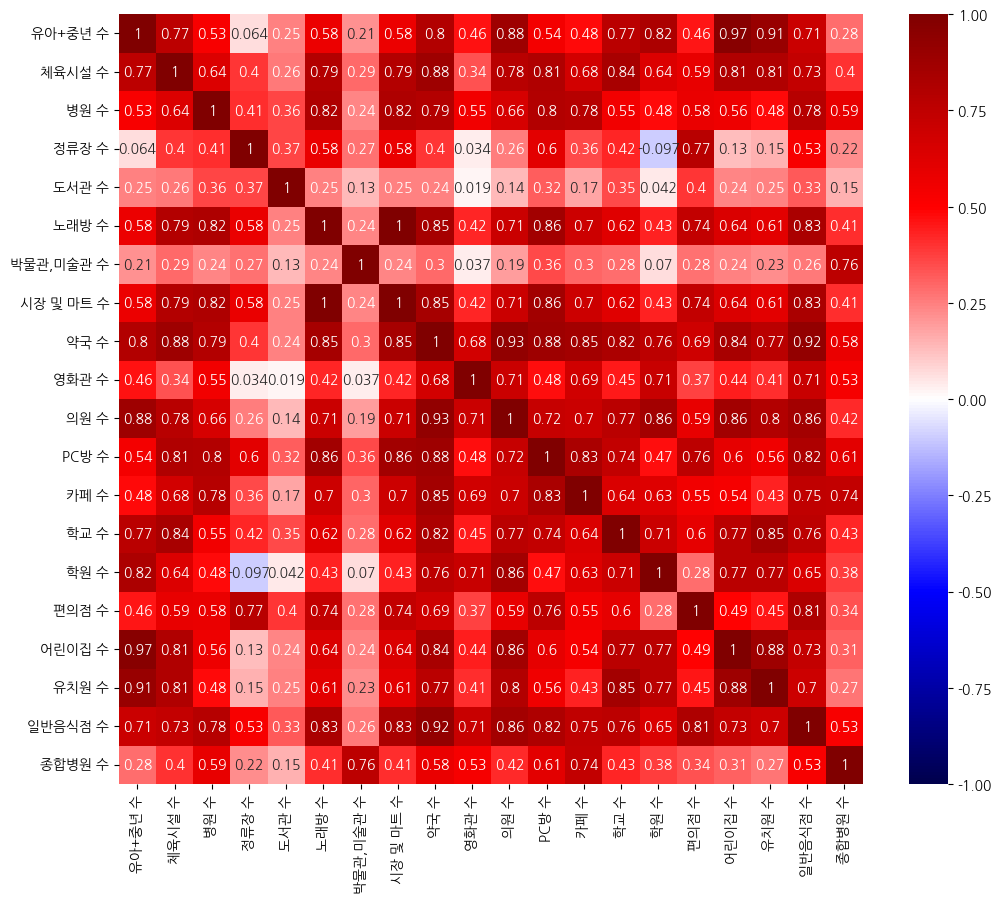

In [324]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

corrMat = kid_middle[['유아+중년 수','체육시설 수', '병원 수','정류장 수','도서관 수', '노래방 수',
        '박물관,미술관 수', '시장 및 마트 수', '약국 수', '영화관 수','의원 수','PC방 수','카페 수',
        '학교 수','학원 수','편의점 수','어린이집 수','유치원 수','일반음식점 수','종합병원 수']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrMat, cmap='seismic', annot=True, vmin = -1, vmax = 1)

In [325]:
# 청년 인구 비율 데이터를 y로, 나머지 데이터 중 상관관계가 거의 없는 것과 행정동 제외, 다중공선성은 일단 고려 X
drop_columns = ['유아+중년 수','행정구역']

In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(kid_middle.drop(drop_columns, axis = 1), kid_middle['유아+중년 수'], test_size=0.2, random_state=0)

In [327]:
y_train = y_train.astype('float')
y_test = y_test.astype('float')
X_train = X_train.astype('float')
X_test = X_test.astype('float')
#데이터를 float 형으로 변환

In [328]:
from sklearn.ensemble import RandomForestRegressor
#랜덤 포레스트를 위한 라이브러리

RF_model = RandomForestRegressor(random_state = 40, n_estimators = 20, max_depth=3) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train) #학습

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=40)

In [329]:
RF_pred_train = RF_model.predict(X_train)
RF_pred_test = RF_model.predict(X_test)

In [330]:
RMSE(np.array(y_train), RF_pred_train)

np.float64(0.049139180808245676)

In [331]:
RMSE(np.array(y_test), RF_pred_test)

np.float64(0.12381818955577283)

In [332]:
RF_model.feature_importances_

array([7.94696183e-04, 6.74063536e-03, 1.82779725e-02, 1.04923188e-02,
       4.32925549e-03, 2.07065308e-03, 1.28446455e-01, 9.04620278e-03,
       0.00000000e+00, 6.47552824e-02, 5.43083046e-03, 2.20388862e-03,
       2.93554613e-04, 2.35037058e-01, 1.09310742e-03, 5.97349551e-03,
       4.89659840e-01, 1.51754317e-02, 1.79322361e-04])

In [333]:
X_train.columns

Index(['병원 수', '노래방 수', '체육시설 수', '도서관 수', '박물관,미술관 수', '시장 및 마트 수', '약국 수',
       '정류장 수', '영화관 수', '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '일반음식점 수',
       '편의점 수', '어린이집 수', '유치원 수', '종합병원 수'],
      dtype='object')

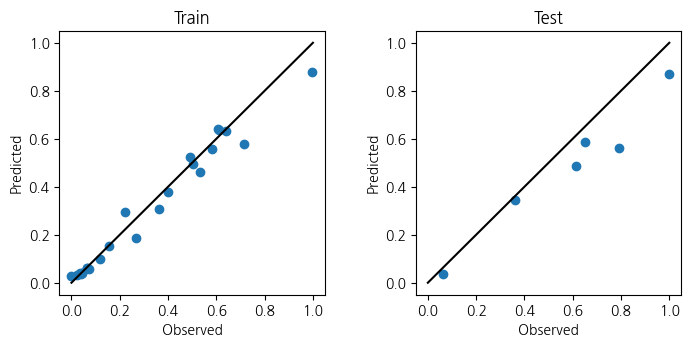

In [334]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

#모델의 결과를 그림으로 그리기
fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [335]:
from sklearn.model_selection import GridSearchCV #그리드 서치 라이브러리
from sklearn import metrics #평가지표 판단에 쓰는 라이브러리

RF_model = RandomForestRegressor()

RMSE_scorer = metrics.make_scorer(RMSE, greater_is_better = False)
#평가함수. RMSE로 평가할거임. 값이 큰 것이 좋은게 아니므로(오차를 나타내므로 작은게 좋다) False

RF_params = {'random_state' : [40], 'n_estimators': list(range(5, 51, 5)), 'max_depth': list(range(2, 6, 1))}
#랜덤성 고정시키고 샘플링을 5~50 5단위로(즉, 5, 10, 15, ..), 최대 깊이를 2~5 1단위로 (즉, 2, 3, 4, 5)

In [336]:
GS_RF_model = GridSearchCV(estimator = RF_model,
                           param_grid = RF_params,
                           scoring = RMSE_scorer,
                           cv = 5)
     

In [337]:
GS_RF_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50],
                         'random_state': [40]},
             scoring=make_scorer(RMSE, greater_is_better=False, response_method='predict'))

In [338]:
GS_RF_model.best_params_

{'max_depth': 3, 'n_estimators': 5, 'random_state': 40}

In [339]:
GS_RF_pred_test = GS_RF_model.best_estimator_.predict(X_test)
GS_RF_pred_train = GS_RF_model.best_estimator_.predict(X_train)

In [340]:
RMSE(y_train, GS_RF_pred_train)

np.float64(0.04258257855954411)

In [341]:
RMSE(y_test, GS_RF_pred_test)

np.float64(0.10225327744012029)

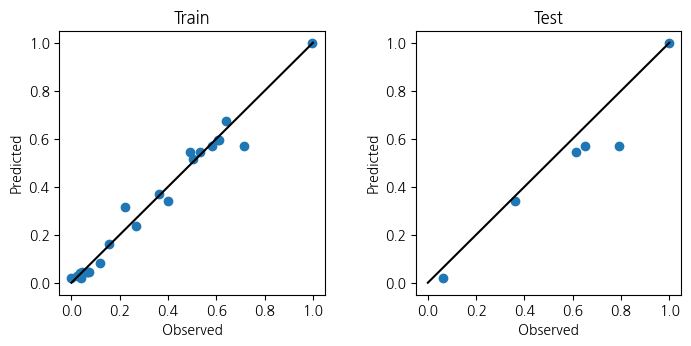

In [342]:
x_min = min(y_train.min(), y_test.min())
x_max = max(y_train.max(), y_test.max())
x = np.linspace(x_min, x_max, 100)  # x값을 최소값에서 최대값까지 100개로 설정
y = x  # y = x 설정

fig, axs = plt.subplots(1,2) #1, 2 크기로 만들기
plt.tight_layout(h_pad=3, w_pad=3) #안겹치게, 높이, 너비 3 크기씩 띄워서
fig.set_size_inches(7,3) #크기는 7, 3 인치

axs[0].plot(y_train, GS_RF_pred_train, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[0].set_title('Train')

axs[0].set_xlabel('Observed')
axs[0].set_ylabel('Predicted')

axs[1].plot(y_test, GS_RF_pred_test, 'o', x,y, 'k')
#'o'는 점 찍기, y=x 그래프 그리기('k'= 검은색으로)
axs[1].set_title('Test')

axs[1].set_xlabel('Observed')
axs[1].set_ylabel('Predicted')

plt.show()

In [343]:
RF_model = RandomForestRegressor(random_state = 40, n_estimators = 5, max_depth=3) #랜덤 포레스트 정의.
RF_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=5, random_state=40)

In [344]:
RF_model.feature_importances_

array([1.93385024e-03, 2.11350070e-02, 3.02907233e-02, 0.00000000e+00,
       0.00000000e+00, 2.12773929e-03, 4.10257237e-04, 3.05279266e-03,
       0.00000000e+00, 3.43031928e-02, 1.18127628e-03, 0.00000000e+00,
       0.00000000e+00, 3.51958733e-01, 0.00000000e+00, 0.00000000e+00,
       5.48057497e-01, 4.83164198e-03, 7.17289445e-04])

In [345]:
X_train.columns

Index(['병원 수', '노래방 수', '체육시설 수', '도서관 수', '박물관,미술관 수', '시장 및 마트 수', '약국 수',
       '정류장 수', '영화관 수', '의원 수', 'PC방 수', '카페 수', '학교 수', '학원 수', '일반음식점 수',
       '편의점 수', '어린이집 수', '유치원 수', '종합병원 수'],
      dtype='object')

In [346]:
pred_data = pd.read_csv('kid_middle.csv', encoding='cp949')

scaler = MinMaxScaler()
# 행정구역 열 제외하고 모든 열 정규화
pred_normalized = pred_data.copy()
columns_to_normalize = pred_data.columns.drop('행정구역','유아+중년 수')
pred_normalized[columns_to_normalize] = scaler.fit_transform(pred_data[columns_to_normalize])
pred_normalized['유아+중년 수'] = scaler.fit_transform(pred_data['유아+중년 수'].values.reshape(-1,1))
pred_data = pred_normalized

# pred_data = pred_data[pred_data['행정구역']=='매송면'] # 매송면

pred_x = pred_data[GS_RF_model.best_estimator_.feature_names_in_]
pred_y = pred_data['유아+중년 수']

res = GS_RF_model.predict(pred_x)
res_unscaled = scaler.inverse_transform([res])
print(res_unscaled)

[[39068.          3214.71       39068.         23236.995
    844.80833333  1528.81833333  1829.185       1829.185
   1528.81833333  1829.185        844.80833333  1162.95833333
   1829.185      13306.56666667 26423.595      13306.56666667
  12346.05       21291.94166667  6402.45        9239.55
  23236.995      14486.         20211.24166667 22321.34166667
  22321.34166667 22296.595      22321.34166667 21291.94166667
  21291.94166667   844.80833333]]


In [347]:
original_population = pd.DataFrame(res_unscaled[0], columns=['유아+중년 수'])
original_population['행정구역'] = pred_data['행정구역']
original_population = original_population[['행정구역', '유아+중년 수']]
original_population

,행정구역,유아+중년 수
0,봉담읍,39068.000000
1,우정읍,3214.710000
2,향남읍,39068.000000
3,남양읍,23236.995000
4,매송면,844.808333
5,비봉면,1528.818333
6,마도면,1829.185000
7,송산면,1829.185000
8,서신면,1528.818333
9,팔탄면,1829.185000


In [348]:
pred_data = pd.read_csv('kid_middle.csv', encoding='cp949')

increase_amount = 1
facility_idx = 18  # 어린이집 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','유아+중년 수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['유아+중년 수'] = scaler.fit_transform(modified_data['유아+중년 수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[GS_RF_model.best_estimator_.feature_names_in_]
    mod_pred_y = modified_data['유아+중년 수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['유아+중년 수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,39068.000000,39068.000000,0.00,0.000000
1,우정읍,3214.710000,3214.710000,0.00,0.000000
2,향남읍,39068.000000,39068.000000,0.00,0.000000
3,남양읍,23236.995000,23236.995000,0.00,0.000000
4,매송면,844.808333,844.808333,0.00,0.000000
5,비봉면,1528.818333,1528.818333,0.00,0.000000
6,마도면,1829.185000,1829.185000,0.00,0.000000
7,송산면,1829.185000,1829.185000,0.00,0.000000
8,서신면,1528.818333,1528.818333,0.00,0.000000
9,팔탄면,1829.185000,1829.185000,0.00,0.000000


In [349]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %")
print(f"남부 평균 인구 증가율: {south:.2f} %")

어린이집 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 1.31 %
서부 평균 인구 증가율: 0.00 %
남부 평균 인구 증가율: 0.00 %


In [350]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 1.31 %
서부 평균 인구 증가율: 0.00 %


In [351]:
pred_data = pd.read_csv('kid_middle.csv', encoding='cp949')

increase_amount = 1
facility_idx = 19  # 유치원 수
# 새로운 데이터프레임을 위한 빈 리스트 초기화
add_population = []

for i in range(0,29):
    modified_data = pred_data.copy()
    modified_data.iloc[i, facility_idx] += increase_amount # 병원
    
    scaler = MinMaxScaler()
    scaler = MinMaxScaler()
    
    # 행정구역 열 제외하고 모든 열 정규화
    modi_normalized = modified_data.copy()
    columns_to_normalize = modified_data.columns.drop('행정구역','유아+중년 수')
    modi_normalized[columns_to_normalize] = scaler.fit_transform(modified_data[columns_to_normalize])
    modi_normalized['유아+중년 수'] = scaler.fit_transform(modified_data['유아+중년 수'].values.reshape(-1,1))

    mod_pred_x = modi_normalized[GS_RF_model.best_estimator_.feature_names_in_]
    mod_pred_y = modified_data['유아+중년 수']
    res = GS_RF_model.predict(mod_pred_x)
    res_unscaled = scaler.inverse_transform([res])
    
    # 원래 인구 수와 비교하여 증가량 계산
    original_population_value = original_population['유아+중년 수'].iloc[i]
    predicted_population = res_unscaled[0][i]
    
    # 인구 수 증가량과 비율 계산
    population_increase = predicted_population - original_population_value
    population_increase_rate = (population_increase / original_population_value) * 100 if original_population_value > 0 else 0

    # 결과를 리스트에 추가
    add_population.append({
        '행정구역': modified_data['행정구역'].iloc[i],
        '원래 인구수': original_population_value,
        '예측 인구수': predicted_population,
        '인구수 증가량': population_increase,
        '증가 비율 (%)': population_increase_rate
    })

result_df = pd.DataFrame(add_population)

result_df

,행정구역,원래 인구수,예측 인구수,인구수 증가량,증가 비율 (%)
0,봉담읍,39068.000000,39068.000000,0.0,0.000000
1,우정읍,3214.710000,3214.710000,0.0,0.000000
2,향남읍,39068.000000,39068.000000,0.0,0.000000
3,남양읍,23236.995000,23236.995000,0.0,0.000000
4,매송면,844.808333,844.808333,0.0,0.000000
5,비봉면,1528.818333,1528.818333,0.0,0.000000
6,마도면,1829.185000,1829.185000,0.0,0.000000
7,송산면,1829.185000,1829.185000,0.0,0.000000
8,서신면,1528.818333,1528.818333,0.0,0.000000
9,팔탄면,1829.185000,1829.185000,0.0,0.000000


In [352]:
# 각 지역별 평균을 계산하고 음수인 경우 0으로 변환
east = max(0, result_df.iloc[[20,21,22,23,24,25,26,27,28,18,17,15,16,14,19],4].mean())
west = max(0, result_df.iloc[[3,4,5,6,7,8,13],4].mean())
south = max(0, result_df.iloc[[0,1,2,9,10,11,12],4].mean())

print(f'{pred_data.columns[facility_idx]} {increase_amount}개 증가 시 인구 증가율')
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 
print(f"남부 평균 인구 증가율: {south:.2f} %")

유치원 수 1개 증가 시 인구 증가율
동부 평균 인구 증가율: 0.80 %
서부 평균 인구 증가율: 1.16 %
남부 평균 인구 증가율: 0.00 %


In [353]:
# 동부: 동탄 병점 반월 진안 화산 기배
# 서부: 나머지
east = max(0, result_df.iloc[[14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],4].mean())
west = max(0, result_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13],4].mean())
print(f"동부 평균 인구 증가율: {east:.2f} %")
print(f"서부 평균 인구 증가율: {west:.2f} %") 

동부 평균 인구 증가율: 0.80 %
서부 평균 인구 증가율: 0.58 %
